#### What is Elastic Net Regression 🚀
##### Elastic Net Regression is a combination of Lasso (L1) and Ridge (L2) regularization techniques. It is used when:
##### ✅ Lasso tends to eliminate too many features.
##### ✅ Ridge does not perform feature selection.
##### ✅ Features are highly correlated (multicollinearity issue).

##### The Elastic Net loss function is:
##### Loss = RSS + 𝛼(𝛽1∑∣𝑤𝑖∣+𝛽2∑𝑤𝑖2)
##### Where:

##### RSS (Residual Sum of Squares) = Measures how well the model fits the data.
##### α (alpha) = Overall strength of regularization (higher = stronger penalty).
##### β₁ (L1 Ratio) = Controls how much Lasso (L1) is applied.
##### β₂ (1 - L1 Ratio) = Controls how much Ridge (L2) is applied.
##### w₁, w₂, ... = Feature coefficients.

##### ✔ If L1 ratio = 1, it behaves like Lasso (sparse model).
##### ✔ If L1 ratio = 0, it behaves like Ridge (no sparsity, all coefficients are small).
##### ✔ If L1 ratio is between 0 and 1, it balances both.

#### Elastic Net vs. Lasso vs. Ridge
##### Feature?	           Lasso (L1)	Ridge (L2)	Elastic Net (L1 + L2)
##### Feature selection?	✅ Yes	    ❌ No	    ✅ Yes (but less aggressive)
##### Handles correlated features?	❌ No	✅ Yes	✅ Yes
##### Coefficients shrink to zero?	✅ Yes	❌ No	✅ Some are zero
##### Works well with many features?✅	    ✅	    ✅

#### In regression problems, we don’t use accuracy percentage like classification models. Instead, we measure the model's performance using metrics like:
##### ✔ R² Score (Coefficient of Determination) → Measures how well predictions match actual values.
##### ✔ Mean Absolute Error (MAE) → Average absolute difference between actual & predicted values.
##### ✔ Mean Squared Error (MSE) & RMSE → Penalizes larger errors more.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
#usng mpg inbuilt dataset for elastic regression
df = pd.DataFrame(sns.load_dataset("mpg"))
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
283,20.2,6,232.0,90.0,3265,18.2,79,usa,amc concord dl 6
226,20.5,6,231.0,105.0,3425,16.9,77,usa,buick skylark
187,17.5,8,305.0,140.0,4215,13.0,76,usa,chevrolet chevelle malibu classic
135,18.0,6,225.0,105.0,3613,16.5,74,usa,plymouth satellite sebring
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


In [3]:
#find null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
#drop null values
df = df.dropna()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
#Convert categorial values into numerical
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
195,29.0,4,85.0,52.0,2035,22.2,76,False,True,False,...,False,False,False,False,False,False,False,False,False,False
64,15.0,8,318.0,150.0,4135,13.5,72,False,True,False,...,False,False,False,False,False,False,False,False,False,False
297,25.4,5,183.0,77.0,3530,20.1,79,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,18.0,6,250.0,88.0,3021,16.5,73,False,True,False,...,False,False,False,False,False,False,False,False,False,False
241,22.0,6,146.0,97.0,2815,14.5,77,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Create target values
X = df.drop(columns=['mpg'])
y = df['mpg']

In [7]:
#train test the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#using elastic net regression 
# l1 ratio => 50% Lasso, 50% Ridge
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [12]:
#calculate mean square error and coefficients
y_pred = elastic.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean Square Error : {mse:.2f}")
print(f"R2 Error : {r2_score:.2f}")
# print(f"Coeficients : {elastic.coef_}")

Mean Square Error : 12.39
R2 Error : 0.76


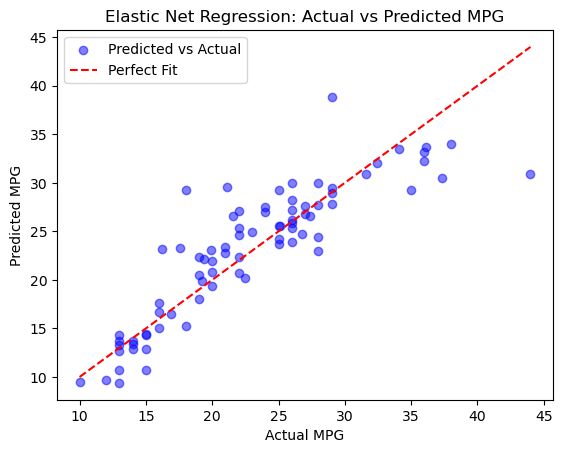

In [11]:
#Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Elastic Net Regression: Actual vs Predicted MPG")
plt.legend()
plt.show()